# 3-1 : The Graphs of Odds, Logit and Sigmoid

### Code.3-1-1: The Graphs of Odds and Logit

/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_43405/3994272575.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 0, 'Probability')

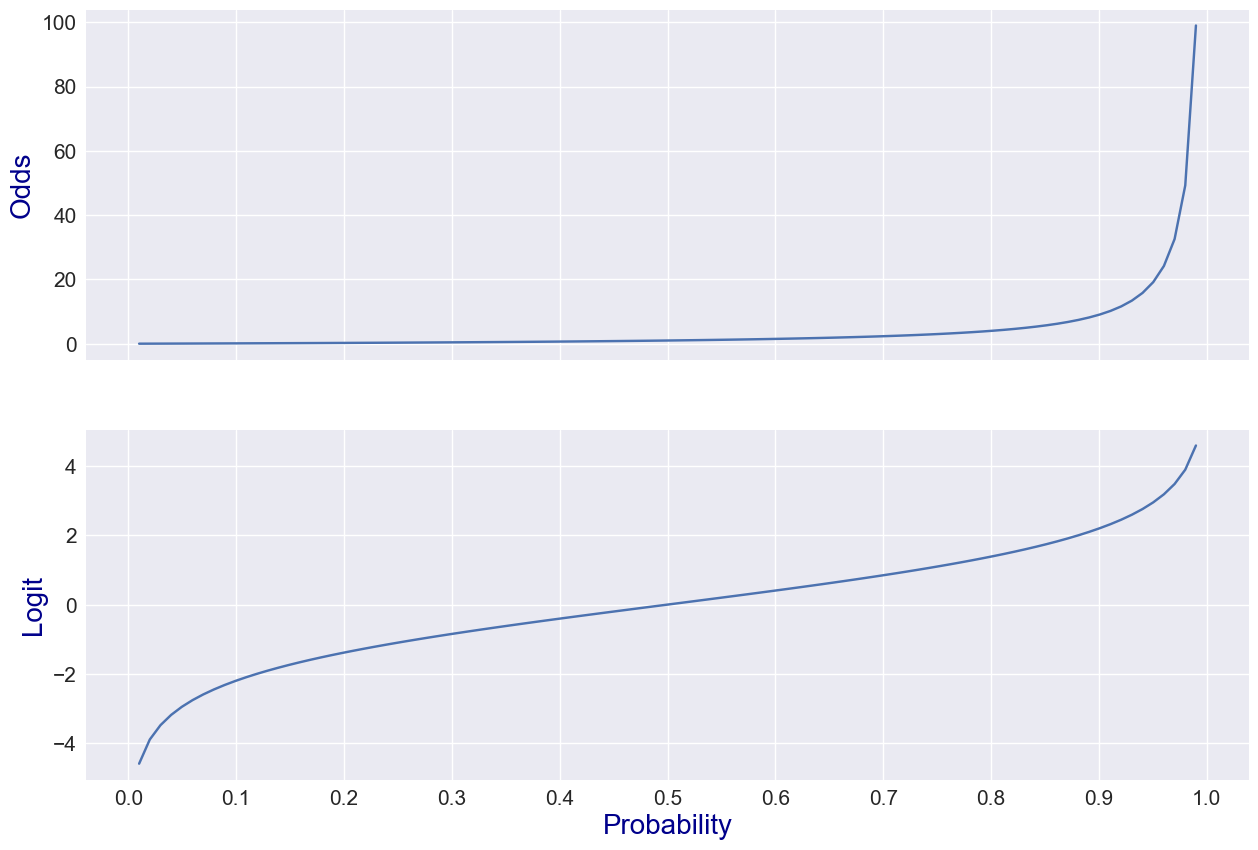

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# 시작값 0.01 ~ 끝값 0.99 까지 100개의 배열 생성
# 시작값과 끝값 사이를 동일한 간격으로 나눈 값을 가진 배열 반환
p_np = np.linspace(0.01, 0.99, 100) 
p_tf = tf.linspace(0.01, 0.99, 100) 

odds_np = p_np / (1-p_np)
odds_tf = p_tf / (1-p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2, 1, figsize = (15 ,10),
                         sharex = True)

axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_tf.numpy())

xticks = np.arange(0, 1.1, 0.1)
axes[0].tick_params(labelsize = 15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize = 20, color = 'darkblue')

axes[1].tick_params(labelsize = 15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize = 20, color = 'darkblue')

axes[1].set_xlabel('Probability', fontsize = 20, color = 'darkblue')

### Code.3-1-2: The Graphs of Sigmoid

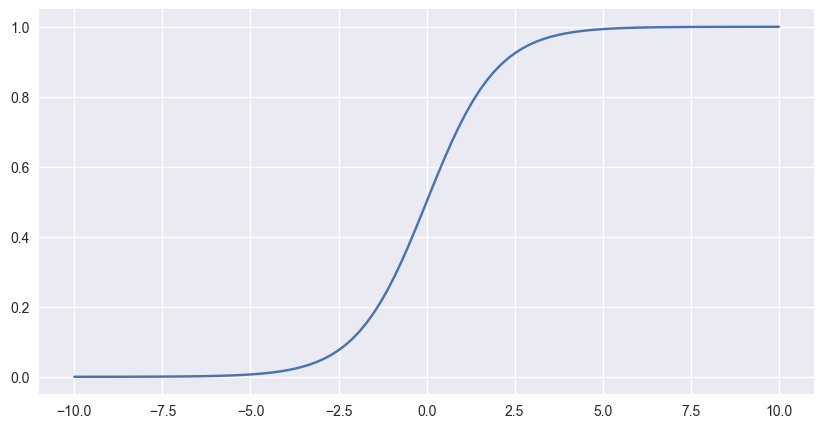

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

X = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(X)

fig, ax = plt.subplots(figsize = (10 ,5))
ax.plot(X.numpy(), sigmoid.numpy())

# 3-2: Logistic Regression Models

### 

### Code.3-2-1: Single-variate Logistic Regression Models

(100, 1)


/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_32016/1285036577.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


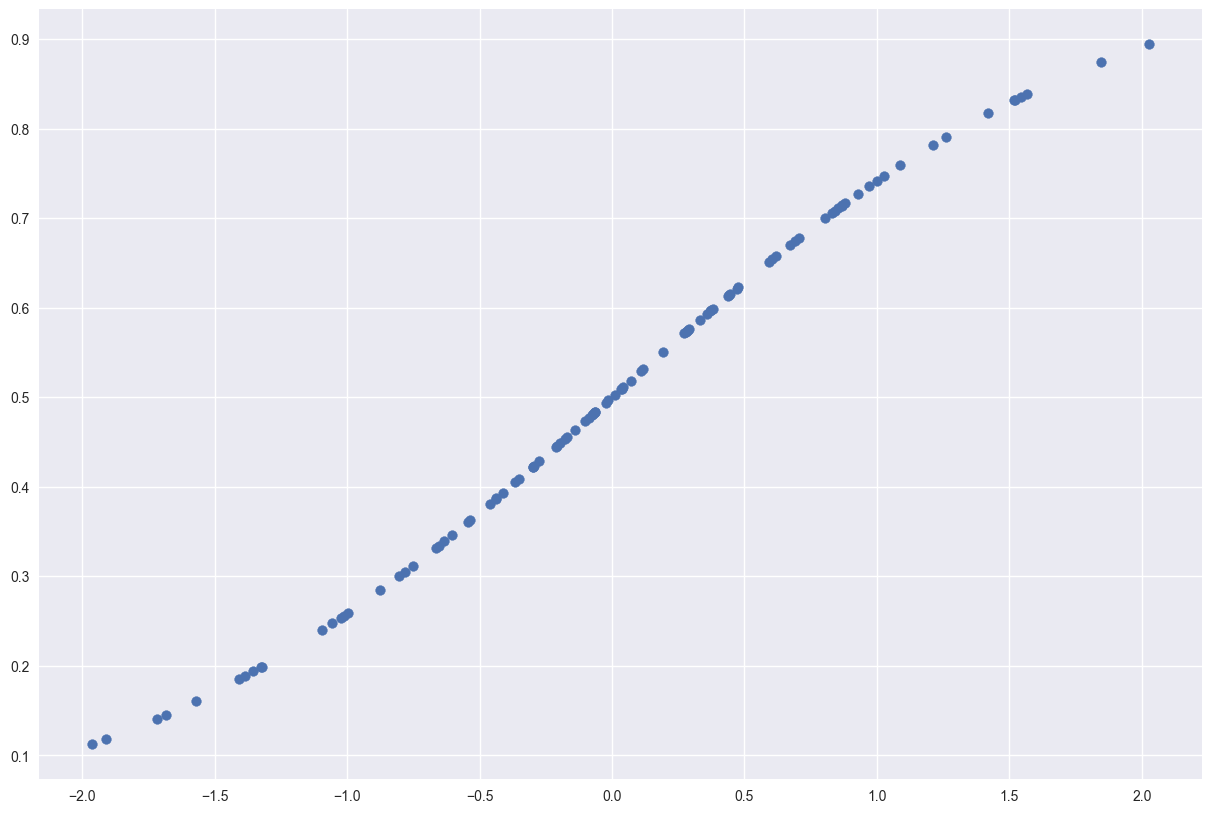

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense


plt.style.use('seaborn')

X = tf.random.normal(shape = (100, 1))
dense = Dense(units = 1, activation = 'sigmoid')
Y = dense(X)
print(Y.shape)

fig, ax = plt.subplots(figsize = (15, 10))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

### Code.3-2-2: Multi-variate Logistic Regression Models

In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense

plt.style.use('seaborn')

N = 100 # 사람 수
n_feature = 5 # 여러가지 종류(공부시간, 용돈, 사교육비, 거주지역, 나이) = Multi variate
X = tf.random.normal(shape = (N, n_feature))
dense = Dense(units=1, activation = 'sigmoid')

Y = dense(X)
print(Y.shape)

# fig, ax = plt.subplots(figsize = (15, 10))
# ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

(100, 1)


/var/folders/g2/t0zgyy0d1tl_58849t9hfg5c0000gn/T/ipykernel_32016/668268266.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 3-3: Binary Classifier with Dense Layers

### Code.3-3-1: Binary Classifier with Dense Layers

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units = 10, activation = 'relu'))
model.add(Dense(units = 5, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# 3-4: Softmax Layers

### Code.3-4-1: IO of Softmax

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Activation
                                # 8개의 클래스
logit = tf.random.uniform(shape = (8, 5), minval =-10, maxval = 10)

softmax_value = Activation('softmax')(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis = 1) # axis0 = 세로축, axis1 = 가로축

print('Logits: ', logit.numpy())
print('Probabilities: ', softmax_value.numpy()) # probabilities의 합은 무조건 1
print('Sum of softmax values: ', softmax_sum.numpy())

Logits:  [[-3.7641406   6.526825    3.6989117  -9.865818    5.7499027 ]
 [-2.1869779  -4.147389    9.843386    9.162085    1.1246634 ]
 [-6.706741   -7.310858   -7.354028    0.69619656  1.4180355 ]
 [ 0.19410133 -0.34953117 -6.883893   -2.593546   -0.15786648]
 [ 1.3403206  -5.845828   -6.3552237   9.9767475  -2.6098824 ]
 [-2.4144292   5.4462337   3.6423492  -2.013433    5.681427  ]
 [ 3.5760307   4.679179    1.0408878  -7.810297    2.9759645 ]
 [ 9.781559    6.4073086   4.0940714   9.157249   -9.540515  ]]
Probabilities:  [[2.2342694e-05 6.5833253e-01 3.8931232e-02 5.0027737e-08 3.0271381e-01]
 [3.9574697e-06 5.5721381e-07 6.6395396e-01 3.3593294e-01 1.0855377e-04]
 [1.9920390e-04 1.0887631e-04 1.0427603e-04 3.2685331e-01 6.7273438e-01]
 [4.2619440e-01 2.4746346e-01 3.5947922e-04 2.6239036e-02 2.9974365e-01]
 [1.7748791e-04 1.3435817e-07 8.0730345e-08 9.9981898e-01 3.4167831e-06]
 [1.5864022e-04 4.1139179e-01 6.7738958e-02 2.3689917e-04 5.2047372e-01]
 [2.1543938e-01 6.4925671e-01 1.

### Code.3-4-2: Softmax in Dense Layers

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation

logit = tf.random.uniform(shape = (8, 5), minval=-10, maxval = 10)
                    # 클래스 갯수
dense = Dense(units = 8, activation = 'softmax')

Y = dense(logit)
print(tf.reduce_sum(Y, axis = 1))

tf.Tensor(
[1.         1.         1.         1.         1.         1.0000001
 1.0000001  0.99999994], shape=(8,), dtype=float32)


# 3-5: Multi-class Classifiers

### Code.3-5-1: Multi-class Classifiers

In [48]:
import tensorflow as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

class TestModel(Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.dense1 = Dense(units = 8, activation = 'relu')
        self.dense2 = Dense(units = 5, activation = 'relu')
        self.dense3 = Dense(units = 3, activation = 'softmax')

    def __call__(self, x):
        print("X: {}\n {}\n".format(X.shape, X.numpy()))

        x = self.dense1(x)
        print("A1: {}\n {}\n".format(x.shape, x.numpy()))

        x = self.dense2(x)
        print("A2: {}\n {}\n".format(x.shape, x.numpy()))

        x = self.dense3(x)
        print("Y: {}\n {}\n\n".format(x.shape, x.numpy()))
        print("Sum of vectors: {}\n".format(tf.reduce_sum(x, axis = 1)))
        return x
    

model = TestModel()

X = tf.random.uniform(shape = (8, 5), minval = -10, maxval = 10)
Y = model(X)


X: (8, 5)
 [[-3.7641406   6.526825    3.6989117  -9.865818    5.7499027 ]
 [-2.1869779  -4.147389    9.843386    9.162085    1.1246634 ]
 [-6.706741   -7.310858   -7.354028    0.69619656  1.4180355 ]
 [ 0.19410133 -0.34953117 -6.883893   -2.593546   -0.15786648]
 [ 1.3403206  -5.845828   -6.3552237   9.9767475  -2.6098824 ]
 [-2.4144292   5.4462337   3.6423492  -2.013433    5.681427  ]
 [ 3.5760307   4.679179    1.0408878  -7.810297    2.9759645 ]
 [ 9.781559    6.4073086   4.0940714   9.157249   -9.540515  ]]

A1: (8, 8)
 [[ 8.641022    0.          9.102451    8.176876    4.5174913   7.7804084
   0.          0.10772954]
 [ 0.          0.65369314  0.          0.          0.          0.
   0.          1.5776209 ]
 [ 0.          0.          0.          0.          9.800359    4.1285353
   7.221417   11.920081  ]
 [ 0.47149414  0.          0.          0.853531    5.4974294   4.29979
   5.229757    2.154882  ]
 [ 0.          4.139422    0.          0.          0.          0.
   7.5145116  